In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import seaborn as sns
sns.set_theme()
sns.set_palette("vlag")

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
total_df = pd.read_csv('../data/DataFrames/total_df', sep = ',', index_col=1)
total_df = total_df.drop(['Unnamed: 0'] ,axis = 1)
total_df.head()

,Poste,Cote,Enchère moy,Note,Note série,Note 1 an,Nb match,Nb match série,Nb match 1 an,Variation,Var série,Var 1 an,But,Buts série,Buts 1 an,%Titu,%Titu série,%Titu 1 an,Temps,Tps série,Tps 1 an,Tps moy,Tps moy série,Tps moy 1 an,Min/But,Min/But 1 an,Min note/but,Prix/but,j19,j18,j17,j16,j15,j14,j13,j12,j11,j10,j9,j8,j7,j6,j5,j4,j3,j2,j1,j38,j37,j36,j35,j34,j33,j32,j31,j30,j29,j28,j27,j26,j25,j24,j23,j22,j21,j20,Cleansheet,But/Peno,But/Coup-franc,But/surface,Pass decis.,Occas° créée,Corner gagné,%Passes,Ballons,Interceptions,Tacles,%Duel,Fautes,But évité,Action stoppée,DMI,Club,Prochain opposant,Date,Victoire probable,%Win+12J,%Win+16J,%Win+20J,Championnat,Classement,pts,J.,G.,N.,P.,p.,c.,+/-,Var E/C,Classement_range,Note_range,Enchère_moy_range
Joueur,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Mbappé Kylian,A,49.0,111.0,6.12,4.50,6.37,17,1.0,35,1.31,6.12,1.49,13.0,6.12,32.0,0.88,6.12,0.94,1361,35.0,2960,80.06,35.0,84.57,105.0,93.0,5.0,3.77,4.5,6.12,5.00,6.50,6.5,5.00,6.00,8.00,7.00,5.00,6.0,5.00,5.0,7.5,6.5,4.50,9.00,7.0,6.12,8.5,8.00,6.0,8.00,4.00,7.00,5.00,9.00,9.00,3.50,7.00,6.12,8.00,5.0,6.00,6.50,6.50,7.00,5.00,7.5,2.00,6.12,2.00,2.0,12.0,32.0,0.8256,891.0,3.00,2.0,37.91,9.0,6.12,6.12,5.75,Paris SG,Reims,dim. 29/01 20:45,50.0,0.78322,0.80856,6.12,Ligue 1,1,47,19,15.0,2,2,48,14,34,62.00,1 - 1-5,4 - entre 6 et 8,5 - 80 et plus
Neymar,A,41.0,70.0,6.38,4.50,6.31,17,2.0,29,1.40,6.38,1.40,11.0,6.38,21.0,0.88,1.00,0.93,1325,180.0,2355,77.94,90.0,81.21,120.0,112.0,4.5,3.73,4.5,4.50,6.38,6.00,5.5,7.50,7.50,6.38,6.50,4.50,5.0,6.00,6.5,6.0,6.5,6.50,9.00,7.5,9.00,7.0,6.38,6.5,6.50,6.00,6.38,7.00,9.00,8.00,4.00,6.00,4.50,5.50,4.5,6.38,6.38,6.38,6.38,6.38,7.0,2.00,6.38,6.38,10.0,12.0,10.0,0.8212,1381.0,2.00,12.0,49.51,22.0,6.38,6.38,4.5,Paris SG,Reims,dim. 29/01 20:45,50.0,0.78322,0.80856,6.38,Ligue 1,1,47,19,15.0,2,2,48,14,34,29.00,1 - 1-5,4 - entre 6 et 8,4 - entre 60 et 80
Messi Lionel,A,40.0,76.0,7.03,6.00,6.68,15,2.0,31,1.25,1.41,1.30,8.0,1.00,13.0,1.00,1.00,0.97,1312,180.0,2689,87.47,90.0,86.74,164.0,207.0,6.5,5.00,5.0,7.00,7.03,7.03,5.5,7.03,7.00,8.00,5.50,7.03,7.0,8.00,7.5,8.0,8.0,5.00,8.00,7.0,9.00,8.0,8.00,5.0,5.50,7.00,7.03,4.50,8.00,6.50,7.03,6.00,4.00,7.50,6.0,6.00,8.00,5.50,7.03,7.03,9.0,7.03,1.00,2.00,10.0,15.0,21.0,0.8355,1240.0,7.03,11.0,51.52,3.0,7.03,7.03,5.5,Paris SG,Reims,dim. 29/01 20:45,50.0,0.78322,0.80856,7.03,Ligue 1,1,47,19,15.0,2,2,48,14,34,36.00,1 - 1-5,4 - entre 6 et 8,4 - entre 60 et 80
Hakimi Achraf,DL,21.0,28.0,5.38,4.50,5.44,17,1.0,32,1.19,5.38,1.01,3.0,5.38,4.0,0.76,5.38,0.81,1211,34.0,2365,71.24,34.0,73.91,404.0,591.0,6.0,7.00,4.5,5.38,4.00,5.00,7.0,5.00,5.38,4.00,6.00,5.00,4.0,5.00,5.5,5.0,4.5,5.00,7.50,7.0,7.50,6.0,5.00,5.0,6.00,5.00,6.50,5.00,5.50,5.50,3.50,6.50,5.38,5.38,5.0,6.00,5.50,5.38,5.38,5.38,7.0,5.38,5.38,1.00,1.0,4.0,6.0,0.8565,927.0,3.00,17.0,46.09,15.0,5.38,5.38,"5,00",Paris SG,Reims,dim. 29/01 20:45,50.0,0.78322,0.80856,5.38,Ligue 1,1,47,19,15.0,2,2,48,14,34,7.00,1 - 1-5,3 - entre 4 et 6,2 - entre 20 et 40
Ekitike Hugo,MO,13.0,13.0,5.04,5.67,5.17,13,6.0,21,1.09,1.37,1.14,3.0,3.00,6.0,0.46,0.83,0.52,505,372.0,943,38.85,62.0,44.90,168.0,157.0,6.0,4.33,4.0,7.00,6.00,4.00,7.0,6.00,5.04,4.50,5.04,5.04,5.0,5.04,4.5,4.5,4.5,5.04,5.04,4.5,4.00,6.0,6.00,5.0,5.04,5.04,5.04,5.04,5.04,5.04,5.04,5.04,5.04,5.04,4.5,5.00,7.00,3.00,5.04,5.04,1.0,5.04,5.04,5.04,2.0,1.0,3.0,0.7718,239.0,4.00,4.0,39.29,7.0,5.04,5.04,"3,00",Paris SG,Reims,dim. 29/01 20:45,50.0,0.78322,0.80856,5.04,Ligue 1,1,47,19,15.0,2,2,48,14,34,5.04,1 - 1-5,3 - entre 4 et 6,1 - moins de 20


In [3]:
X = total_df.drop(['j19','DMI','Club','Prochain opposant','Date','Championnat','Classement_range','Note_range','Enchère_moy_range'],axis=1)
Y = total_df['j19']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

cols = ['Cote', 'Enchère moy','Note', 'Note série', 'Note 1 an', 'Nb match', 'Nb match série', 
        'Nb match 1 an', 'Variation', 'Var série', 'Var 1 an', 'But', 'Buts série', 'Buts 1 an', 
        '%Titu', '%Titu série', '%Titu 1 an', 'Temps', 'Tps série', 'Tps 1 an', 'Tps moy', 'Tps moy série',
        'Tps moy 1 an', 'Min/But', 'Min/But 1 an', 'Min note/but', 'Prix/but',  'Cleansheet', 'But/Peno', 
        'But/Coup-franc', 'But/surface', 'Pass decis.', 'Occas° créée', 'Corner gagné', 
        '%Passes', 'Ballons', 'Interceptions', 'Tacles', '%Duel', 'Fautes', 'But évité', 'Action stoppée', 
        'Victoire probable', '%Win+12J', '%Win+16J', '%Win+20J', 'Classement', 'pts', 'J.', 'G.', 'N.', 'P.', 'p.', 
        'c.', '+/-','Var E/C', 'j18' , 'j17' , 'j16' , 'j15' , 'j14' , 'j13' , 'j12' , 'j11' , 'j10' , 'j9' , 
        'j8' , 'j7' , 'j6' , 'j5' , 'j4' , 'j3' , 'j2' , 'j1' , 'j38' , 'j37' , 'j36' , 'j35' , 'j34' , 'j33' , 'j32' , 
        'j31' , 'j30' , 'j29' , 'j28' , 'j27' , 'j26' , 'j25' , 'j24' , 'j23' , 'j22' , 'j21' , 'j20' ]


sc = StandardScaler()

X_train_out_num = sc.fit_transform(X_train[cols])

X_test_out_num = sc.transform(X_test[cols])



In [5]:
X_train_out_num = pd.DataFrame(X_train_out_num, columns = ['Cote', 'Enchère moy','Note', 'Note série', 'Note 1 an', 'Nb match', 'Nb match série', 
        'Nb match 1 an', 'Variation', 'Var série', 'Var 1 an', 'But', 'Buts série', 'Buts 1 an', 
        '%Titu', '%Titu série', '%Titu 1 an', 'Temps', 'Tps série', 'Tps 1 an', 'Tps moy', 'Tps moy série',
        'Tps moy 1 an', 'Min/But', 'Min/But 1 an', 'Min note/but', 'Prix/but',  'Cleansheet', 'But/Peno', 
        'But/Coup-franc', 'But/surface', 'Pass decis.', 'Occas° créée', 'Corner gagné', 
        '%Passes', 'Ballons', 'Interceptions', 'Tacles', '%Duel', 'Fautes', 'But évité', 'Action stoppée', 
        'Victoire probable', '%Win+12J', '%Win+16J', '%Win+20J', 'Classement', 'pts', 'J.', 'G.', 'N.', 'P.', 'p.', 
        'c.', '+/-','Var E/C', 'j18' , 'j17' , 'j16' , 'j15' , 'j14' , 'j13' , 'j12' , 'j11' , 'j10' , 'j9' , 
        'j8' , 'j7' , 'j6' , 'j5' , 'j4' , 'j3' , 'j2' , 'j1' , 'j38' , 'j37' , 'j36' , 'j35' , 'j34' , 'j33' , 'j32' , 
        'j31' , 'j30' , 'j29' , 'j28' , 'j27' , 'j26' , 'j25' , 'j24' , 'j23' , 'j22' , 'j21' , 'j20' ])


In [6]:
X_test_out_num = pd.DataFrame(X_test_out_num, columns = ['Cote', 'Enchère moy','Note', 'Note série', 'Note 1 an', 'Nb match', 'Nb match série', 
        'Nb match 1 an', 'Variation', 'Var série', 'Var 1 an', 'But', 'Buts série', 'Buts 1 an', 
        '%Titu', '%Titu série', '%Titu 1 an', 'Temps', 'Tps série', 'Tps 1 an', 'Tps moy', 'Tps moy série',
        'Tps moy 1 an', 'Min/But', 'Min/But 1 an', 'Min note/but', 'Prix/but',  'Cleansheet', 'But/Peno', 
        'But/Coup-franc', 'But/surface', 'Pass decis.', 'Occas° créée', 'Corner gagné', 
        '%Passes', 'Ballons', 'Interceptions', 'Tacles', '%Duel', 'Fautes', 'But évité', 'Action stoppée', 
        'Victoire probable', '%Win+12J', '%Win+16J', '%Win+20J', 'Classement', 'pts', 'J.', 'G.', 'N.', 'P.', 'p.', 
        'c.', '+/-','Var E/C', 'j18' , 'j17' , 'j16' , 'j15' , 'j14' , 'j13' , 'j12' , 'j11' , 'j10' , 'j9' , 
        'j8' , 'j7' , 'j6' , 'j5' , 'j4' , 'j3' , 'j2' , 'j1' , 'j38' , 'j37' , 'j36' , 'j35' , 'j34' , 'j33' , 'j32' , 
        'j31' , 'j30' , 'j29' , 'j28' , 'j27' , 'j26' , 'j25' , 'j24' , 'j23' , 'j22' , 'j21' , 'j20' ])




In [7]:
oneh = OneHotEncoder(sparse = False)


X_train_out = oneh.fit_transform(np.array(X_train['Poste']).reshape(-1,1))

X_train_out_cat = pd.DataFrame(X_train_out, columns=X_train['Poste'].unique())





In [8]:
oneh = OneHotEncoder(sparse = False)


X_test_out = oneh.fit_transform(np.array(X_test['Poste']).reshape(-1,1))

X_test_out_cat = pd.DataFrame(X_test_out, columns=X_test['Poste'].unique())



In [9]:
X_train = pd.concat([X_train_out_num, X_train_out_cat],1)

X_test = pd.concat([X_test_out_num, X_test_out_cat],1)




C:\Users\sitte\AppData\Local\Temp\ipykernel_8136\1190645373.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  X_train = pd.concat([X_train_out_num, X_train_out_cat],1)
C:\Users\sitte\AppData\Local\Temp\ipykernel_8136\1190645373.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  X_test = pd.concat([X_test_out_num, X_test_out_cat],1)


In [10]:
total_df_pca = pd.concat([X_train, X_test],0)

C:\Users\sitte\AppData\Local\Temp\ipykernel_8136\2538967871.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  total_df_pca = pd.concat([X_train, X_test],0)


In [11]:
total_df_pca.head()

,Cote,Enchère moy,Note,Note série,Note 1 an,Nb match,Nb match série,Nb match 1 an,Variation,Var série,Var 1 an,But,Buts série,Buts 1 an,%Titu,%Titu série,%Titu 1 an,Temps,Tps série,Tps 1 an,Tps moy,Tps moy série,Tps moy 1 an,Min/But,Min/But 1 an,Min note/but,Prix/but,Cleansheet,But/Peno,But/Coup-franc,But/surface,Pass decis.,Occas° créée,Corner gagné,%Passes,Ballons,Interceptions,Tacles,%Duel,Fautes,But évité,Action stoppée,Victoire probable,%Win+12J,%Win+16J,%Win+20J,Classement,pts,J.,G.,N.,P.,p.,c.,+/-,Var E/C,j18,j17,j16,j15,j14,j13,j12,j11,j10,j9,j8,j7,j6,j5,j4,j3,j2,j1,j38,j37,j36,j35,j34,j33,j32,j31,j30,j29,j28,j27,j26,j25,j24,j23,j22,j21,j20,DL,MD,A,MO,DC,G
0,-1.518970,-1.187067,-0.139601,-0.150227,-0.176707,-1.942882,-0.327595,-1.898993,3.532042,0.914790,4.306085,0.569148,0.350122,0.277062,3.020005,0.969597,3.642269,-1.485581,-0.645514,-1.515228,-2.211962,-0.941178,-2.476686,-0.605677,-0.668922,-0.693789,0.823895,0.536182,0.142855,0.000518,0.261214,0.572315,0.541131,-0.051672,1.638680,-0.952949,-0.401940,-0.442472,-1.460846,-0.584853,-0.187792,-0.171446,0.205656,3.067290,3.220728,0.524765,0.222268,-0.132869,0.202154,-0.301476,0.619959,-0.036707,-0.716219,-1.027536,0.118641,0.077300,-0.057959,-0.082425,-0.080160,-0.080341,-0.090668,-0.084164,-0.089671,-0.059613,-0.067144,-0.059619,-0.058895,-0.079859,-0.079615,-0.073549,-0.077692,-0.071141,-0.084646,-0.079642,-0.114247,-0.122146,-0.093665,-0.076900,-0.085605,-0.106505,-0.085157,-0.107556,-0.071099,-0.103793,-0.092426,-0.097671,-0.077838,-0.086982,-0.084728,-0.101485,-0.128958,-0.085367,-0.105668,0.0,0.0,1.0,0.0,0.0,0.0
1,1.435013,1.229124,1.444214,1.187111,2.396409,0.363920,-0.188120,0.905138,-0.287536,1.254210,0.057357,0.949796,0.866841,-0.786437,-0.222540,1.307168,-0.071056,0.367844,-0.644081,1.084962,0.408755,-0.921011,0.774470,-0.603879,1.122207,2.596433,0.823895,-0.484736,0.937710,1.119148,0.884906,-1.263526,-1.088176,-0.888390,-0.496968,1.355769,2.247250,1.185692,0.982879,0.967843,-0.056295,0.110448,0.205656,-0.018634,-0.539399,-1.787353,-1.517343,1.651266,-2.419590,1.851553,-1.562620,-1.632715,1.593652,-1.159663,1.700008,0.489159,0.805791,0.808576,-0.080160,-0.080341,1.173573,-0.084164,0.794874,0.551017,0.563271,-0.059619,1.138298,-0.722587,2.309776,0.765441,1.625039,1.707069,2.372873,0.518913,1.117174,1.184035,3.542098,0.791882,-0.085605,1.205601,1.844518,-0.107556,0.579358,2.535805,0.554151,2.538465,0.883842,-2.649395,1.198849,3.292273,3.839667,3.834658,1.878759,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.586133,-0.629484,-1.366499,-1.092014,-1.564171,-0.345865,-1.113372,-1.057753,-0.760436,0.651859,-0.862471,0.274281,-0.050154,0.082087,2.589232,0.708098,3.139232,-1.173163,-0.621304,-1.341313,-1.674298,-0.600327,-1.892672,-0.607071,-0.669732,-1.296996,0.823895,0.255430,-0.472877,-0.866027,-0.221928,0.235744,0.242425,-0.205070,-0.655178,-0.732701,-1.025279,-0.605289,0.155567,-0.443699,-0.289655,-0.389814,0.205656,-0.355227,-0.333398,0.259667,0.918113,-0.762564,0.202154,-0.916628,0.619959,0.601696,-0.138751,1.615000,-1.010906,-0.035961,-0.727061,-0.709891,-0.699828,-0.691496,-0.786000,-0.768718,-0.774882,-0.731306,-1.327973,-0.713977,-0.717352,-0.722587,-0.736697,-0.723472,-0.077692,-1.256614,-0.699025,-0.678198,-0.791529,-0.840545,-0.760222,-0.749901,-0.816900,-0.828164,-0.792704,-0.793770,-0.786601,-0.829683,-0.803661,-0.822609,-0.822801,-0.791646,-0.790696,-0.848112,-0.856539,-0.804038,-0.833291,1.0,0.0,0.0,0.0,0.0,0.0
3,2.834269,3.180663,0.975762,0.923411,0.580092,0.896259,1.440402,1.465965,-0.132934,-0.973532,-0.095947,1.105271,1.077895,1.340561,-0.112889,-0.932211,-0.089348,1.061681,1.571669,1.406118,0.766934,1.156764,0.575647,-0.055895,-0.170649,0.402952,-1.220456,1.557100,0.702612,0.788285,0.700433,-1.875473,0.541131,0.785046,-0.573576,0.518826,-0.557775,-0.116840,-0.191442,1.532459,-0.095188,0.027071,0.205656,-0.150499,-0.084305,0.765762,-0.995459,1.231470,0.202154,1.236402,-0.471331,-0.994312,1.362664,-0.631156,1.248189,2.960310,-1.274508,-0.082425,-0.699828,-0.080341

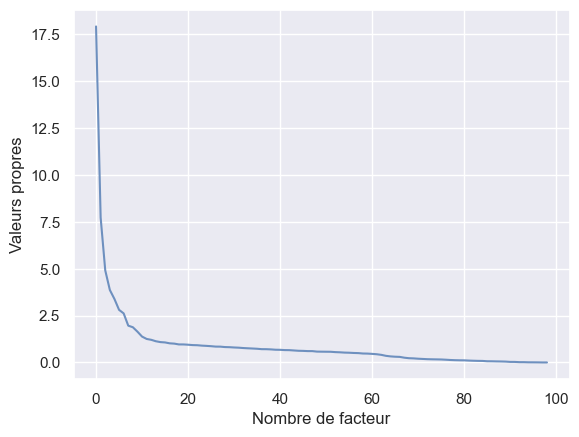

In [12]:
pca = PCA()
Coord = pca.fit_transform(total_df_pca)

plt.plot(np.arange(0, 99), pca.explained_variance_)
plt.xlabel('Nombre de facteur')
plt.ylabel('Valeurs propres');

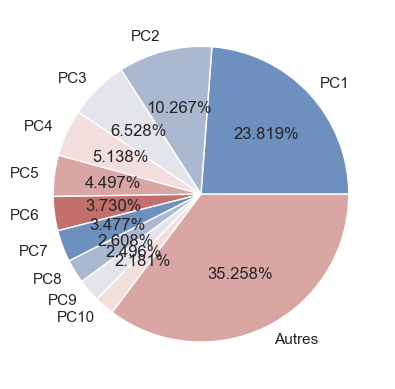

In [13]:
L1 = list(pca.explained_variance_ratio_[0:10])
L1.append(sum(pca.explained_variance_ratio_[10:39]))

plt.pie(L1, labels=['PC1','PC2','PC3','PC4',
                    'PC5','PC6','PC7','PC8',
                    'PC9','PC10','Autres'], 
        autopct='%1.3f%%')
plt.show()

In [14]:
total_df = pd.read_csv('../data/DataFrames/total_df', sep = ',', index_col=1)
total_df = total_df.drop(['Unnamed: 0'] ,axis = 1)
total_df.head()

,Poste,Cote,Enchère moy,Note,Note série,Note 1 an,Nb match,Nb match série,Nb match 1 an,Variation,Var série,Var 1 an,But,Buts série,Buts 1 an,%Titu,%Titu série,%Titu 1 an,Temps,Tps série,Tps 1 an,Tps moy,Tps moy série,Tps moy 1 an,Min/But,Min/But 1 an,Min note/but,Prix/but,j19,j18,j17,j16,j15,j14,j13,j12,j11,j10,j9,j8,j7,j6,j5,j4,j3,j2,j1,j38,j37,j36,j35,j34,j33,j32,j31,j30,j29,j28,j27,j26,j25,j24,j23,j22,j21,j20,Cleansheet,But/Peno,But/Coup-franc,But/surface,Pass decis.,Occas° créée,Corner gagné,%Passes,Ballons,Interceptions,Tacles,%Duel,Fautes,But évité,Action stoppée,DMI,Club,Prochain opposant,Date,Victoire probable,%Win+12J,%Win+16J,%Win+20J,Championnat,Classement,pts,J.,G.,N.,P.,p.,c.,+/-,Var E/C,Classement_range,Note_range,Enchère_moy_range
Joueur,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Mbappé Kylian,A,49.0,111.0,6.12,4.50,6.37,17,1.0,35,1.31,6.12,1.49,13.0,6.12,32.0,0.88,6.12,0.94,1361,35.0,2960,80.06,35.0,84.57,105.0,93.0,5.0,3.77,4.5,6.12,5.00,6.50,6.5,5.00,6.00,8.00,7.00,5.00,6.0,5.00,5.0,7.5,6.5,4.50,9.00,7.0,6.12,8.5,8.00,6.0,8.00,4.00,7.00,5.00,9.00,9.00,3.50,7.00,6.12,8.00,5.0,6.00,6.50,6.50,7.00,5.00,7.5,2.00,6.12,2.00,2.0,12.0,32.0,0.8256,891.0,3.00,2.0,37.91,9.0,6.12,6.12,5.75,Paris SG,Reims,dim. 29/01 20:45,50.0,0.78322,0.80856,6.12,Ligue 1,1,47,19,15.0,2,2,48,14,34,62.00,1 - 1-5,4 - entre 6 et 8,5 - 80 et plus
Neymar,A,41.0,70.0,6.38,4.50,6.31,17,2.0,29,1.40,6.38,1.40,11.0,6.38,21.0,0.88,1.00,0.93,1325,180.0,2355,77.94,90.0,81.21,120.0,112.0,4.5,3.73,4.5,4.50,6.38,6.00,5.5,7.50,7.50,6.38,6.50,4.50,5.0,6.00,6.5,6.0,6.5,6.50,9.00,7.5,9.00,7.0,6.38,6.5,6.50,6.00,6.38,7.00,9.00,8.00,4.00,6.00,4.50,5.50,4.5,6.38,6.38,6.38,6.38,6.38,7.0,2.00,6.38,6.38,10.0,12.0,10.0,0.8212,1381.0,2.00,12.0,49.51,22.0,6.38,6.38,4.5,Paris SG,Reims,dim. 29/01 20:45,50.0,0.78322,0.80856,6.38,Ligue 1,1,47,19,15.0,2,2,48,14,34,29.00,1 - 1-5,4 - entre 6 et 8,4 - entre 60 et 80
Messi Lionel,A,40.0,76.0,7.03,6.00,6.68,15,2.0,31,1.25,1.41,1.30,8.0,1.00,13.0,1.00,1.00,0.97,1312,180.0,2689,87.47,90.0,86.74,164.0,207.0,6.5,5.00,5.0,7.00,7.03,7.03,5.5,7.03,7.00,8.00,5.50,7.03,7.0,8.00,7.5,8.0,8.0,5.00,8.00,7.0,9.00,8.0,8.00,5.0,5.50,7.00,7.03,4.50,8.00,6.50,7.03,6.00,4.00,7.50,6.0,6.00,8.00,5.50,7.03,7.03,9.0,7.03,1.00,2.00,10.0,15.0,21.0,0.8355,1240.0,7.03,11.0,51.52,3.0,7.03,7.03,5.5,Paris SG,Reims,dim. 29/01 20:45,50.0,0.78322,0.80856,7.03,Ligue 1,1,47,19,15.0,2,2,48,14,34,36.00,1 - 1-5,4 - entre 6 et 8,4 - entre 60 et 80
Hakimi Achraf,DL,21.0,28.0,5.38,4.50,5.44,17,1.0,32,1.19,5.38,1.01,3.0,5.38,4.0,0.76,5.38,0.81,1211,34.0,2365,71.24,34.0,73.91,404.0,591.0,6.0,7.00,4.5,5.38,4.00,5.00,7.0,5.00,5.38,4.00,6.00,5.00,4.0,5.00,5.5,5.0,4.5,5.00,7.50,7.0,7.50,6.0,5.00,5.0,6.00,5.00,6.50,5.00,5.50,5.50,3.50,6.50,5.38,5.38,5.0,6.00,5.50,5.38,5.38,5.38,7.0,5.38,5.38,1.00,1.0,4.0,6.0,0.8565,927.0,3.00,17.0,46.09,15.0,5.38,5.38,"5,00",Paris SG,Reims,dim. 29/01 20:45,50.0,0.78322,0.80856,5.38,Ligue 1,1,47,19,15.0,2,2,48,14,34,7.00,1 - 1-5,3 - entre 4 et 6,2 - entre 20 et 40
Ekitike Hugo,MO,13.0,13.0,5.04,5.67,5.17,13,6.0,21,1.09,1.37,1.14,3.0,3.00,6.0,0.46,0.83,0.52,505,372.0,943,38.85,62.0,44.90,168.0,157.0,6.0,4.33,4.0,7.00,6.00,4.00,7.0,6.00,5.04,4.50,5.04,5.04,5.0,5.04,4.5,4.5,4.5,5.04,5.04,4.5,4.00,6.0,6.00,5.0,5.04,5.04,5.04,5.04,5.04,5.04,5.04,5.04,5.04,5.04,4.5,5.00,7.00,3.00,5.04,5.04,1.0,5.04,5.04,5.04,2.0,1.0,3.0,0.7718,239.0,4.00,4.0,39.29,7.0,5.04,5.04,"3,00",Paris SG,Reims,dim. 29/01 20:45,50.0,0.78322,0.80856,5.04,Ligue 1,1,47,19,15.0,2,2,48,14,34,5.04,1 - 1-5,3 - entre 4 et 6,1 - moins de 20


In [15]:
X = total_df.drop(['j19','DMI','Club','Prochain opposant','Date','Championnat','Classement_range','Note_range','Enchère_moy_range', 
                   'j18' , 'j17' , 'j16' , 'j15' , 'j14' , 'j13' , 'j12' , 'j11' , 'j10' , 'j9' , 'j8' , 'j7' , 'j6' , 'j5' , 
                   'j4' , 'j3' , 'j2' , 'j1' , 'j38' , 'j37' , 'j36' , 'j35' , 'j34' , 'j33' , 'j32' , 'j31' , 'j30' , 'j29' , 
                   'j28' , 'j27' , 'j26' , 'j25' , 'j24' , 'j23' , 'j22' , 'j21' , 'j20'],axis=1)
Y = total_df['j19']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

cols = ['Cote', 'Enchère moy','Note', 'Note série', 'Note 1 an', 'Nb match', 'Nb match série', 
        'Nb match 1 an', 'Variation', 'Var série', 'Var 1 an', 'But', 'Buts série', 'Buts 1 an', 
        '%Titu', '%Titu série', '%Titu 1 an', 'Temps', 'Tps série', 'Tps 1 an', 'Tps moy', 'Tps moy série',
        'Tps moy 1 an', 'Min/But', 'Min/But 1 an', 'Min note/but', 'Prix/but',  'Cleansheet', 'But/Peno', 
        'But/Coup-franc', 'But/surface', 'Pass decis.', 'Occas° créée', 'Corner gagné', 
        '%Passes', 'Ballons', 'Interceptions', 'Tacles', '%Duel', 'Fautes', 'But évité', 'Action stoppée', 
        'Victoire probable', '%Win+12J', '%Win+16J', '%Win+20J', 'Classement', 'pts', 'J.', 'G.', 'N.', 'P.', 'p.', 
        'c.', '+/-','Var E/C' ]


sc = StandardScaler()

X_train_out_num = sc.fit_transform(X_train[cols])

X_test_out_num = sc.transform(X_test[cols])

In [17]:
X_train_out_num = pd.DataFrame(X_train_out_num, columns = ['Cote', 'Enchère moy','Note', 'Note série', 'Note 1 an', 'Nb match', 'Nb match série', 
        'Nb match 1 an', 'Variation', 'Var série', 'Var 1 an', 'But', 'Buts série', 'Buts 1 an', 
        '%Titu', '%Titu série', '%Titu 1 an', 'Temps', 'Tps série', 'Tps 1 an', 'Tps moy', 'Tps moy série',
        'Tps moy 1 an', 'Min/But', 'Min/But 1 an', 'Min note/but', 'Prix/but',  'Cleansheet', 'But/Peno', 
        'But/Coup-franc', 'But/surface', 'Pass decis.', 'Occas° créée', 'Corner gagné', 
        '%Passes', 'Ballons', 'Interceptions', 'Tacles', '%Duel', 'Fautes', 'But évité', 'Action stoppée', 
        'Victoire probable', '%Win+12J', '%Win+16J', '%Win+20J', 'Classement', 'pts', 'J.', 'G.', 'N.', 'P.', 'p.', 
        'c.', '+/-','Var E/C'])



In [18]:
X_test_out_num = pd.DataFrame(X_test_out_num, columns = ['Cote', 'Enchère moy','Note', 'Note série', 'Note 1 an', 'Nb match', 'Nb match série', 
        'Nb match 1 an', 'Variation', 'Var série', 'Var 1 an', 'But', 'Buts série', 'Buts 1 an', 
        '%Titu', '%Titu série', '%Titu 1 an', 'Temps', 'Tps série', 'Tps 1 an', 'Tps moy', 'Tps moy série',
        'Tps moy 1 an', 'Min/But', 'Min/But 1 an', 'Min note/but', 'Prix/but',  'Cleansheet', 'But/Peno', 
        'But/Coup-franc', 'But/surface', 'Pass decis.', 'Occas° créée', 'Corner gagné', 
        '%Passes', 'Ballons', 'Interceptions', 'Tacles', '%Duel', 'Fautes', 'But évité', 'Action stoppée', 
        'Victoire probable', '%Win+12J', '%Win+16J', '%Win+20J', 'Classement', 'pts', 'J.', 'G.', 'N.', 'P.', 'p.', 
        'c.', '+/-','Var E/C'])




In [19]:
oneh = OneHotEncoder(sparse = False)


X_train_out = oneh.fit_transform(np.array(X_train['Poste']).reshape(-1,1))

X_train_out_cat = pd.DataFrame(X_train_out, columns=X_train['Poste'].unique())





In [20]:
oneh = OneHotEncoder(sparse = False)


X_test_out = oneh.fit_transform(np.array(X_test['Poste']).reshape(-1,1))

X_test_out_cat = pd.DataFrame(X_test_out, columns=X_test['Poste'].unique())





In [21]:
X_train = pd.concat([X_train_out_num, X_train_out_cat],1)

X_test = pd.concat([X_test_out_num, X_test_out_cat],1)


C:\Users\sitte\AppData\Local\Temp\ipykernel_8136\3126381643.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  X_train = pd.concat([X_train_out_num, X_train_out_cat],1)
C:\Users\sitte\AppData\Local\Temp\ipykernel_8136\3126381643.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  X_test = pd.concat([X_test_out_num, X_test_out_cat],1)


In [22]:
total_df_pca = pd.concat([X_train, X_test],0)

C:\Users\sitte\AppData\Local\Temp\ipykernel_8136\2538967871.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  total_df_pca = pd.concat([X_train, X_test],0)


In [23]:
total_df_pca.head()

,Cote,Enchère moy,Note,Note série,Note 1 an,Nb match,Nb match série,Nb match 1 an,Variation,Var série,Var 1 an,But,Buts série,Buts 1 an,%Titu,%Titu série,%Titu 1 an,Temps,Tps série,Tps 1 an,Tps moy,Tps moy série,Tps moy 1 an,Min/But,Min/But 1 an,Min note/but,Prix/but,Cleansheet,But/Peno,But/Coup-franc,But/surface,Pass decis.,Occas° créée,Corner gagné,%Passes,Ballons,Interceptions,Tacles,%Duel,Fautes,But évité,Action stoppée,Victoire probable,%Win+12J,%Win+16J,%Win+20J,Classement,pts,J.,G.,N.,P.,p.,c.,+/-,Var E/C,A,DL,MO,DC,MD,G
0,-0.272315,-0.442946,-0.060464,-0.079509,-0.189554,0.020967,-0.309925,-0.470229,-0.151658,0.938913,-0.264171,-1.588332,0.370899,-1.173839,-0.563514,0.984688,-0.576058,-0.798946,-0.644613,-0.995141,-1.153531,-0.942883,-1.337722,0.295853,0.025285,1.464828,-1.221420,0.564468,0.184413,0.064554,0.298812,0.602253,0.547871,-0.052513,1.670104,-0.957368,-0.390297,-0.439644,-1.463412,-0.580247,-0.184996,-0.158250,0.199512,-0.519945,-0.409229,0.557087,0.390774,-0.128898,0.220214,-0.295816,0.592125,-0.027792,-0.021109,0.306092,-0.189003,0.080608,1.0,0.0,0.0,0.0,0.0,0.0
1,0.515086,0.220644,0.185625,0.129557,-0.265459,0.908069,-0.288056,1.026099,-0.032275,0.991380,-0.119729,-1.049540,0.451173,-0.802331,-0.111296,1.036807,-0.123359,1.395411,-0.644388,1.117280,1.168384,-0.939735,0.679712,1.288408,1.130109,0.922888,-1.225535,1.315342,0.306210,0.233887,-3.166703,0.668850,-1.648177,-0.063635,-0.586896,2.018198,1.807311,2.319475,0.957270,0.548789,-0.164537,-0.114625,-4.865368,-0.316637,-0.265699,-1.655283,0.216861,-0.340127,-1.070294,-0.605150,1.129307,-0.345636,-0.963899,-0.358881,-0.417574,-0.565162,0.0,0.0,1.0,0.0,0.0,0.0
2,0.515086,0.220644,0.677803,0.547688,0.139367,0.553228,-0.244318,0.839058,0.050374,1.096314,-0.053064,-0.510749,0.611721,-0.430823,-0.212656,1.141046,-0.286330,0.594297,-0.643936,0.538120,0.531491,-0.933440,0.121300,0.298411,0.259370,0.922888,-1.230329,1.058194,0.549805,0.572555,0.581886,-1.238261,-0.017448,3.272725,-0.589690,0.466016,-0.868859,0.367268,0.239899,0.832466,-0.123621,-0.027376,0.199512,-0.116469,-0.086211,-1.816246,-1.348356,1.349706,-1.070294,1.560187,-1.556604,-0.981325,0.450286,-0.890858,0.801474,-0.565162,0.0,0.0,0.0,0.0,0.0,1.0
3,0.672567,0.315442,0.968635,0.794765,0.594795,-0.511294,-0.218473,-0.283188,-0.124108,1.158321,0.035823,-1.588332,0.706591,-0.430823,-0.368593,1.202642,-0.268222,-0.338402,-0.643669,-0.156656,0.305031,-0.929719,0.397673,0.904688,-0.059701,0.380949,-1.209075,0.029599,0.693748,0.772677,0.693400,0.880751,0.797917,0.075380,-0.546087,0.111457,0.075672,-0.771519,0.321136,-0.160405,-0.099443,0.024180,0.199512,-0.103633,-0.039822,0.776052,-0.304878,-0.234513,0.220214,1.250853,0.054942,-1.299169,0.685983,-1.289841,1.182426,-0.565162,0.0,1.0,0.0,0.0,0.0,0.0
4,1.459968,1.642622,0.767290,1.269914,0.215271,0.730649,-0.119068,1.026099,0.032008,-1.045298,-0.097507,1.105624,-1.847582,1.798225,-0.204859,-0.929518,-0.413086,0.803283,0.382153,0.314452,0.622075,1.321584,-0.332492,-0.113448,-0.402629,0.380949,-1.233086,1.829640,0.594096,-6.154614,-3.166703,0.826263,0.526128,2.160605,-0.555789,0.686631,-1.026280,0.204584,0.064552,1.825336,-0.116181,-0.011513,0.199512,-0.113070,-0.057521,0.733211,-1.348356,1.772165,0.220214,1.869521,-1.019422,-1.299169,1.746622,-1.156847,1.791950,1.346657,1.0,0.0,0.0,0.0,0.0,0.0


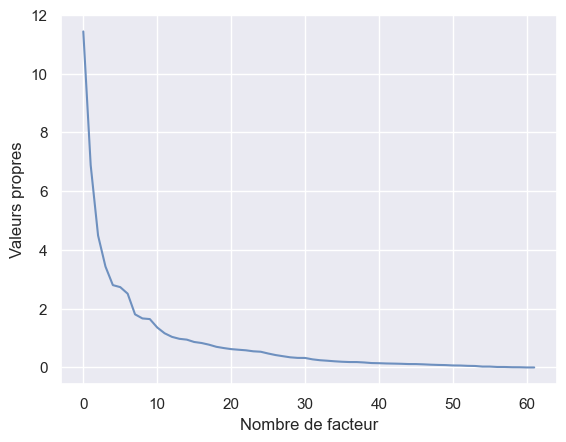

In [24]:
pca = PCA()
Coord = pca.fit_transform(total_df_pca)

plt.plot(np.arange(0, 62), pca.explained_variance_)
plt.xlabel('Nombre de facteur')
plt.ylabel('Valeurs propres');

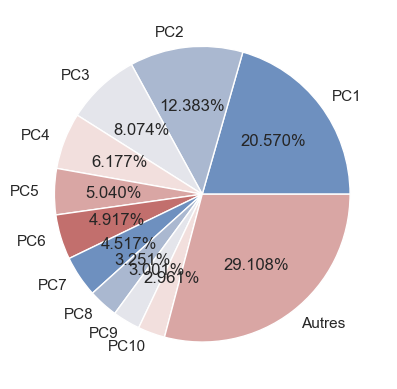

In [25]:
L1 = list(pca.explained_variance_ratio_[0:10])
L1.append(sum(pca.explained_variance_ratio_[10:39]))

plt.pie(L1, labels=['PC1','PC2','PC3','PC4',
                    'PC5','PC6','PC7','PC8',
                    'PC9','PC10','Autres'], 
        autopct='%1.3f%%')
plt.show()